This is a companion notebook for my post here. The notebook outlines similarities and differences between Pytorch and Tensorflow. 

First, let's create a simple SGD approximator for $f(x) = x^{exp}$, where $exp$ is a model parameter.

# Plain Pytorch

In [41]:
import torch
from torch.autograd import Variable
import numpy as np

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return torch.sqrt(torch.mean((y - y_hat).pow(2).sum()))

def forward(x, e):
    """Forward pass for our function"""
    return x.pow(e.repeat(x.size(0)))

# Let's define some settings
n = 100 # number of examples
learning_rate = 5e-6

# Model definition
x = Variable(torch.rand(n) * 10, requires_grad=False)

# Model parameter and it's true value
exp = Variable(torch.FloatTensor([2.0]), requires_grad=False)
exp_hat = Variable(torch.FloatTensor([4]), requires_grad=True)
y = forward(x, exp)

loss_history = []
exp_history = []

# Training loop
for i in range(0, 200):
    print("Iteration %d" % i)
    
    # Compute current estimate
    y_hat = forward(x, exp_hat)
    
    # Calculate loss function
    loss = rmse(y, y_hat)
    
    # Do some recordings for plots
    loss_history.append(loss.data[0])
    exp_history.append(y_hat.data[0])
    
    # Compute gradients
    loss.backward()
    
    print("loss = %s" % loss.data[0])
    print("exp = %s" % exp_hat.data[0])
    
    # Update model parameters
    exp_hat.data -= learning_rate * exp_hat.grad.data
    exp_hat.grad.data.zero_()

Iteration 0
loss = 31486.984375
exp = 4.0
Iteration 1
loss = 14398.49609375
exp = 3.64985728263855
Iteration 2
loss = 9984.84765625
exp = 3.4879090785980225
Iteration 3
loss = 7705.31103515625
exp = 3.3744404315948486
Iteration 4
loss = 6282.35546875
exp = 3.2859721183776855
Iteration 5
loss = 5300.4287109375
exp = 3.2130908966064453
Iteration 6
loss = 4578.4267578125
exp = 3.1509552001953125
Iteration 7
loss = 4023.53076171875
exp = 3.0967135429382324
Iteration 8
loss = 3582.866455078125
exp = 3.0485341548919678
Iteration 9
loss = 3223.950927734375
exp = 3.0051655769348145
Iteration 10
loss = 2925.66259765625
exp = 2.965712785720825
Iteration 11
loss = 2673.640625
exp = 2.9295122623443604
Iteration 12
loss = 2457.76611328125
exp = 2.8960580825805664
Iteration 13
loss = 2270.693359375
exp = 2.864955186843872
Iteration 14
loss = 2106.953857421875
exp = 2.835888624191284
Iteration 15
loss = 1962.39306640625
exp = 2.8086037635803223
Iteration 16
loss = 1833.79248046875
exp = 2.78289103507

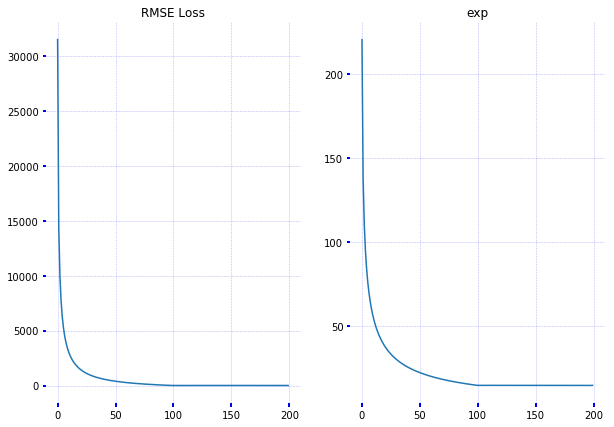

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_results(loss_history, exp_history):
    fig = plt.figure(figsize=(10, 7))
    fig.add_axes()

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    for ax in [ax1, ax2]:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.grid(color='b', linestyle='--', linewidth=0.5, alpha=0.3)
        ax.tick_params(direction='out', color='b', width='2')
        
    ax1.set_title('RMSE Loss')
    ax2.set_title('exp')
    ax1.plot(np.arange(len(loss_history)), loss_history)
    ax2.plot(np.arange(len(exp_history)), exp_history)
    
plot_results(loss_history, exp_history)

# Pytorch with optimizers

In [ ]:
import torch
from torch.autograd import Variable
import numpy as np

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return torch.sqrt(torch.mean((y - y_hat).pow(2)))

def forward(x, e):
    """Forward pass for our function"""
    return x.pow(e.repeat(x.size(0)))

# Let's define some settings
n = 1000 # number of examples
learning_rate = 5e-10

# Model definition
x = Variable(torch.rand(n) * 10, requires_grad=False)
y = forward(x, exp)

# Model parameters
exp = Variable(torch.FloatTensor([2.0]), requires_grad=False)
exp_hat = Variable(torch.FloatTensor([4]), requires_grad=True)

# Optimizer (NEW)
opt = torch.optim.SGD([exp_hat], lr=learning_rate, momentum=0.9)

loss_history = []
exp_history = []

# Training loop
for i in range(0, 10000):
    opt.zero_grad()
    print("Iteration %d" % i)
    
    # Compute current estimate
    y_hat = forward(x, exp_hat)
    
    # Calculate loss function
    loss = rmse(y, y_hat)
    
    # Do some recordings for plots
    loss_history.append(loss.data[0])
    exp_history.append(y_hat.data[0])
    
    # Update model parameters
    loss.backward()
    opt.step()
    
    print("loss = %s" % loss.data[0])
    print("exp = %s" % exp_hat.data[0])

In [ ]:
plot_results(loss_history, exp_history)

# Tensorflow

In [ ]:
import tensorflow as tf

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return tf.sqrt(tf.reduce_mean(tf.square((y - y_hat))))

def forward(x, e):
    """Forward pass for our function"""
    # tensorflow has automatic broadcasting 
    # so we do not need to reshape e manually
    return tf.pow(x, e) 

n = 100 # number of examples
learning_rate = 5e-6

# Placeholders for data
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Model parameters
exp = tf.constant(2.0)
exp_hat = tf.Variable(4.0, name='exp_hat')

# Model definition
y_hat = forward(x, exp_hat)

# Optimizer
loss = rmse(y, y_hat)
opt = tf.train.GradientDescentOptimizer(learning_rate)

# We will run this operation to perform a single training step,
# e.g. opt.step() in Pytorch.
# Execution of this operation will also update model parameters
train_op = opt.minimize(loss) 

# Let's generate some training data
x_train = np.random.rand(n) + 10
y_train = x_train ** 2

loss_history = []
exp_history = []

# First, we need to create a Tensorflow session object
with tf.Session() as sess:
    
    # Initialize all defined variables
    tf.global_variables_initializer().run()
    
    # Training loop
    for i in range(0, 500):
        print("Iteration %d" % i)
        # Run a single trainig step
        curr_loss, curr_exp, _ = sess.run([loss, exp_hat, train_op], feed_dict={x: x_train, y: y_train})
        
        print("loss = %s" % curr_loss)
        print("exp = %s" % curr_exp)
        
        # Do some recordings for plots
        loss_history.append(curr_loss)
        exp_history.append(curr_exp)

In [ ]:
plot_results(loss_history, exp_history)

And now let's introduce the Tensorboard. This tool is very useful for debugging and comparison of different training runs. For example, you can train a model then tune some hyperparameters and train it again. Both runs can be displayed at Tensorboard simultaneously to indicate possible differences. Tensorboard can:
- Display model graph
- Plot sclarar variables
- Visualize disbtibutions and histograms
- Visualize images
- Visualize embeddings
- Play audio

In [1]:
import tensorflow as tf
import numpy as np

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return tf.sqrt(tf.reduce_mean(tf.square((y - y_hat))))

def forward(x, e):
    """Forward pass for our function"""
    # tensorflow has automatic broadcasting 
    # so we do not need to reshape e manually
    return tf.pow(x, e) 

n = 100 # number of examples
learning_rate = 5e-6

# Placeholders for data
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Model parameters
exp = tf.constant(2.0)
exp_hat = tf.Variable(4.0, name='exp_hat')

# Model definition
y_hat = forward(x, exp_hat)

# Optimizer
loss = rmse(y, y_hat)
opt = tf.train.GradientDescentOptimizer(learning_rate)

# Summaries (NEW)
loss_summary = tf.summary.scalar("loss", loss)
exp_summary = tf.summary.scalar("exp", exp_hat)
all_summaries = tf.summary.merge_all()

# We will run this operation to perform a single training step,
# e.g. opt.step() in Pytorch.
# Execution of this operation will also update model parameters
train_op = opt.minimize(loss) 

# Let's generate some training data
x_train = np.random.rand(n) + 10
y_train = x_train ** 2

loss_history = []
exp_history = []

# First, we need to create a Tensorflow session object
with tf.Session() as sess:
    
    # Initialize all defined variables
    tf.global_variables_initializer().run()
    
    summary_writer = tf.summary.FileWriter('./tensorboard', sess.graph)
    
    # Training loop
    for i in range(0, 500):
        print("Iteration %d" % i)
        # Run a single trainig step
        summaries, curr_loss, curr_exp, _ = sess.run([all_summaries, loss, exp_hat, train_op], feed_dict={x: x_train, y: y_train})
        
        print("loss = %s" % curr_loss)
        print("exp = %s" % curr_exp)
        
        # Do some recordings for plots
        loss_history.append(curr_loss)
        exp_history.append(curr_exp)
        
        summary_writer.add_summary(summaries, i)

Iteration 0
loss = 12361.6
exp = 3.85277
Iteration 1
loss = 8699.6
exp = 3.74877
Iteration 2
loss = 6781.7
exp = 3.66742
Iteration 3
loss = 5577.4
exp = 3.60028
Iteration 4
loss = 4743.76
exp = 3.54299
Iteration 5
loss = 4129.67
exp = 3.49294
Iteration 6
loss = 3657.2
exp = 3.44847
Iteration 7
loss = 3281.74
exp = 3.40843
Iteration 8
loss = 2975.81
exp = 3.37201
Iteration 9
loss = 2721.51
exp = 3.33858
Iteration 10
loss = 2506.64
exp = 3.30769
Iteration 11
loss = 2322.6
exp = 3.27897
Iteration 12
loss = 2163.12
exp = 3.25214
Iteration 13
loss = 2023.56
exp = 3.22695
Iteration 14
loss = 1900.36
exp = 3.20321
Iteration 15
loss = 1790.79
exp = 3.18077
Iteration 16
loss = 1692.69
exp = 3.15949
Iteration 17
loss = 1604.33
exp = 3.13925
Iteration 18
loss = 1524.31
exp = 3.11995
Iteration 19
loss = 1451.51
exp = 3.10151
Iteration 20
loss = 1384.98
exp = 3.08386
Iteration 21
loss = 1323.93
exp = 3.06693
Iteration 22
loss = 1267.72
exp = 3.05066
Iteration 23
loss = 1215.79
exp = 3.035
Iteration

loss = 54.2312
exp = 2.16632
Iteration 213
loss = 53.4707
exp = 2.16438
Iteration 214
loss = 52.7171
exp = 2.16244
Iteration 215
loss = 51.9703
exp = 2.16052
Iteration 216
loss = 51.2304
exp = 2.1586
Iteration 217
loss = 50.4972
exp = 2.15669
Iteration 218
loss = 49.7705
exp = 2.15479
Iteration 219
loss = 49.0503
exp = 2.1529
Iteration 220
loss = 48.3366
exp = 2.15102
Iteration 221
loss = 47.6292
exp = 2.14914
Iteration 222
loss = 46.9281
exp = 2.14728
Iteration 223
loss = 46.2331
exp = 2.14542
Iteration 224
loss = 45.5442
exp = 2.14357
Iteration 225
loss = 44.8613
exp = 2.14173
Iteration 226
loss = 44.1843
exp = 2.13989
Iteration 227
loss = 43.5132
exp = 2.13807
Iteration 228
loss = 42.8479
exp = 2.13625
Iteration 229
loss = 42.1883
exp = 2.13444
Iteration 230
loss = 41.5342
exp = 2.13264
Iteration 231
loss = 40.8858
exp = 2.13084
Iteration 232
loss = 40.2429
exp = 2.12905
Iteration 233
loss = 39.6053
exp = 2.12727
Iteration 234
loss = 38.9731
exp = 2.1255
Iteration 235
loss = 38.3461

Iteration 431
loss = 0.148265
exp = 1.99925
Iteration 432
loss = 0.196784
exp = 2.00056
Iteration 433
loss = 0.1472
exp = 1.99925
Iteration 434
loss = 0.197847
exp = 2.00056
Iteration 435
loss = 0.146134
exp = 1.99924
Iteration 436
loss = 0.198909
exp = 2.00055
Iteration 437
loss = 0.145068
exp = 1.99924
Iteration 438
loss = 0.19994
exp = 2.00055
Iteration 439
loss = 0.144003
exp = 1.99923
Iteration 440
loss = 0.201002
exp = 2.00054
Iteration 441
loss = 0.142938
exp = 1.99923
Iteration 442
loss = 0.202064
exp = 2.00054
Iteration 443
loss = 0.141872
exp = 1.99923
Iteration 444
loss = 0.203126
exp = 2.00054
Iteration 445
loss = 0.140807
exp = 1.99922
Iteration 446
loss = 0.204189
exp = 2.00053
Iteration 447
loss = 0.139741
exp = 1.99922
Iteration 448
loss = 0.205251
exp = 2.00053
Iteration 449
loss = 0.138675
exp = 1.99921
Iteration 450
loss = 0.206313
exp = 2.00052
Iteration 451
loss = 0.13761
exp = 1.99921
Iteration 452
loss = 0.207375
exp = 2.00052
Iteration 453
loss = 0.136544
exp = 

# PyTorch modules

In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# download and transform train dataset
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../mnist_data', 
                                                          download=True, 
                                                          train=True,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                              transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ])), 
                                           batch_size=10, 
                                           shuffle=True)

# download and transform test dataset
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../mnist_data', 
                                                          download=True, 
                                                          train=False,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                              transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ])), 
                                           batch_size=10, 
                                           shuffle=True)

class CNNClassifier(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    
    def forward(self, x):
        # input is 28x28x1
        # conv1(kernel=5, filters=10) 28x28x10 -> 24x24x10
        # max_pool(kernel=2) 24x24x10 -> 12x12x10
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        
        # conv2(kernel=5, filters=20) 12x12x20 -> 8x8x20
        # max_pool(kernel=2) 8x8x20 -> 4x4x20
        x = F.relu(F.max_pool2d(self.dropout(self.conv2(x)), 2))
        
        # flatten 4x4x20 = 320
        x = x.view(-1, 320)
        
        # 320 -> 50
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        
        # 50 -> 10
        x = self.fc2(x)
        
        # transform to logits
        reutrn F.log_softmax(x)

In [ ]:
F.max_pool2d()